<a href="https://colab.research.google.com/github/metahwi/MachineLearning/blob/main/Multi-Layer%20perceptron%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks



## Classification of non-linearly separable dataset using multi-layer perceptron

Lets try building a neural network model using PyTorch and use it to classify a toy data set which is not linearly separable.

In [ ]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/473-Fall23-Recitation/Fall2023-473-Lab8')

# some predefined helper functions provided for plotting data and model outputs
from plot_lib import plot_data, plot_model, set_default


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
set_default()

In [ ]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

### Create the dataset
We will now create a data set consisting of three classes and is in the shape of a spiral.

In [ ]:
X = torch.zeros(N * C, D)
y = torch.zeros(N * C, dtype=torch.long)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2

    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


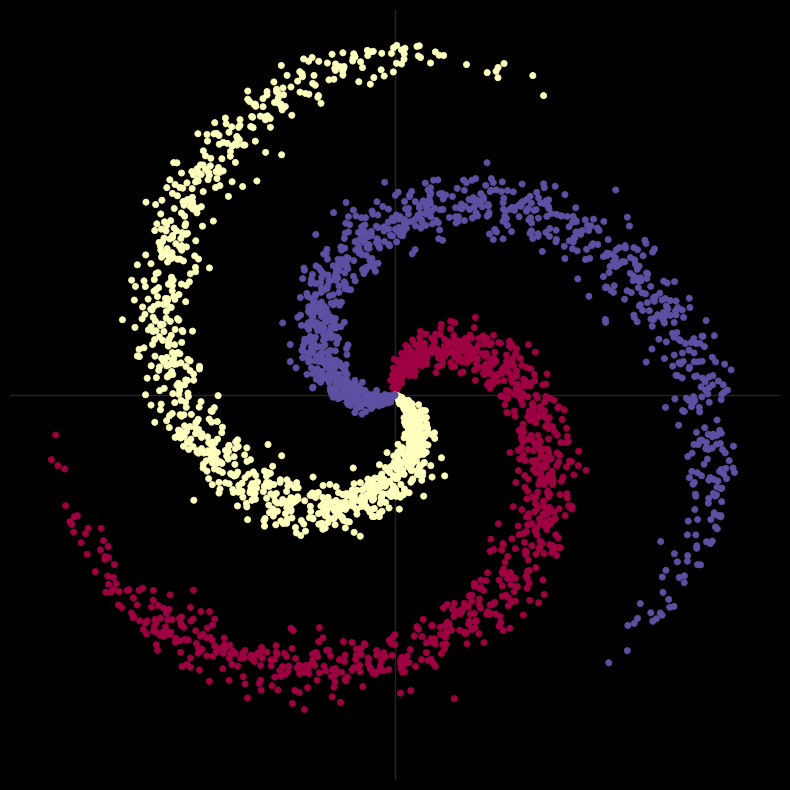

In [ ]:
# visualise the data using the plot_data function provided as a helper function
plot_data(X, y)

### Linear Model
We now define a linear classification model using PyTorch and train it using stochastic gradient descent with the help of the autograd package.

Let's start by initializing the hyper-parameter values such as the learning rate, regularization coefficient etc.

In [ ]:
learning_rate = 1e-3
steps = 1000 # num. of training steps

Create the linear model and print it.

In [ ]:
# nn package to create our linear model. Notice the Sequential container class.
# Each Linear module has a weight and bias
# The order in which the Linear modules are defined is important as it creates the directed acyclic graph
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

# Print the model
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


Create the training loop and print the metrics (loss and accuracy) at the end of each iteration.

In [ ]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for t in range(steps):

    # Forward pass over the model to get the logits
    y_pred = model(X)

    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)

    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()

    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()

    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.883849, [ACCURACY]: 0.501


We can now plot the output of the model (in this case a collection of hyper-planes):

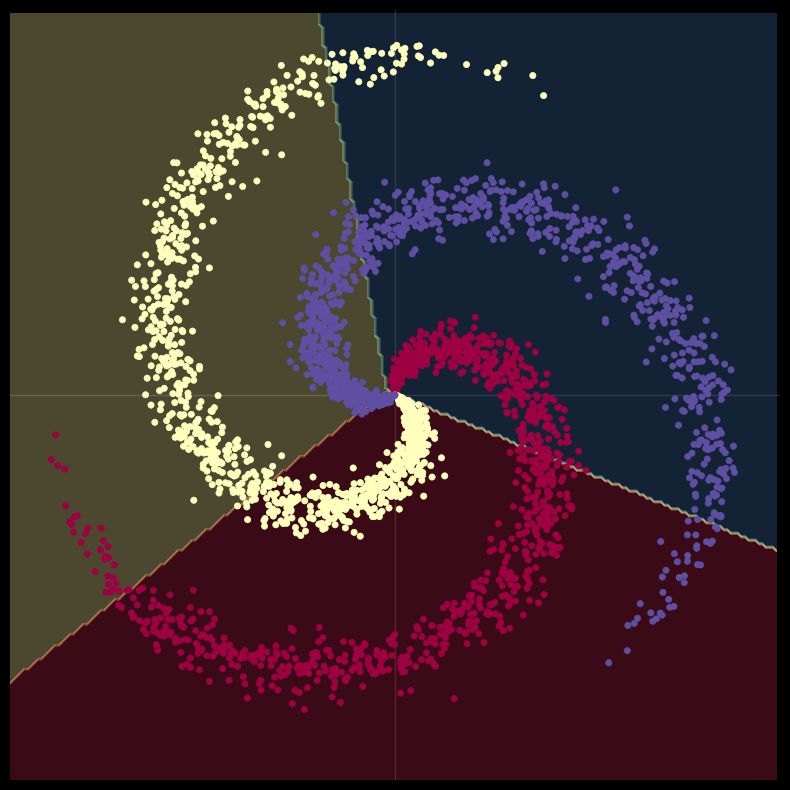

In [ ]:
# Plot trained model
plot_model(X, y, model)

### Two-layer neural network
We now define a two layer (single hidden layer) neural network model using PyTorch and train it using stochastic gradient descent with the help of the autograd package.

We will extend our linear model with ReLU as the activation units to create a multi-layer perceptron.

In [ ]:
# Initialize the hyper-parameters
learning_rate = 1e-3

# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


Let's use the new model to perform the classification task on the same data set and observe the accuracy.

In [ ]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training
for t in range(steps):

    # Forward pass over the model to get the logits
    y_pred = model(X)

    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)

    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()

    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()

    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.953869, [ACCURACY]: 0.515


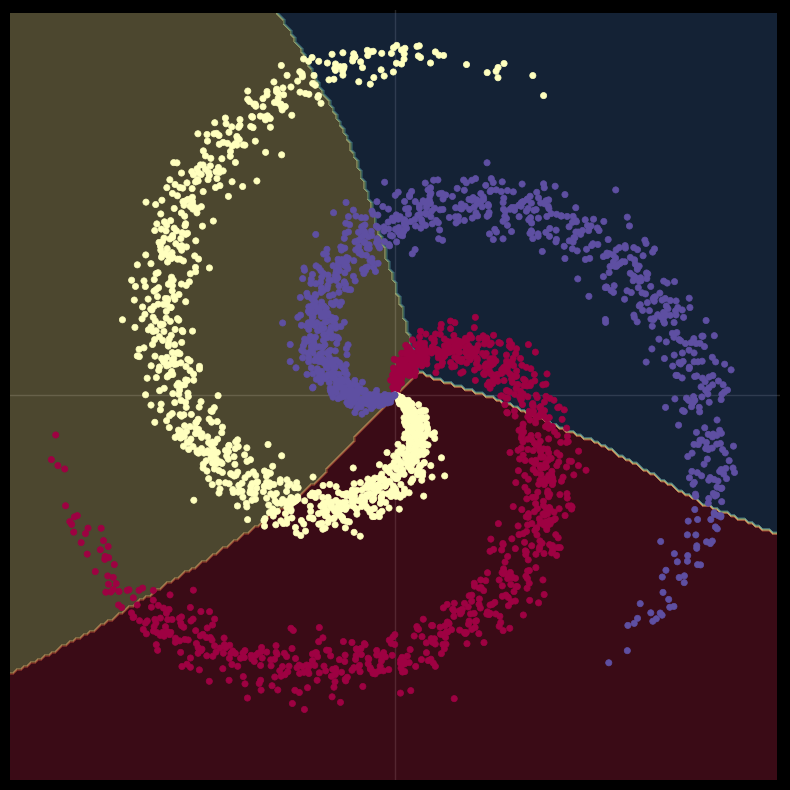

In [ ]:
# Plot trained model
plot_model(X, y, model)

## Exercise 1

Experiment with the perceptron model by adding more hidden layers to the nn.Sequential module, such that there are more linear layers and activations to better extract more information useful for classification. Note that in between hidden layers we typically use Tanh activations (available in PyTorch as nn.Tanh()).

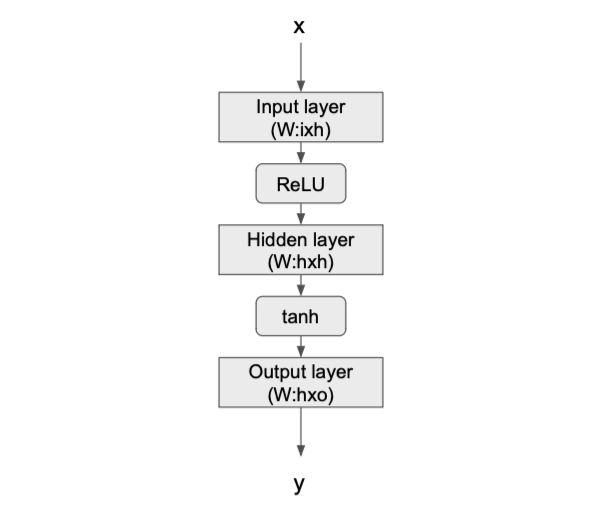

## Regression

We will now demonstrate how to build a linear model and a neural network model for a regression task using PyTorch.  

In [ ]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from plot_lib import plot_data, plot_model, set_default
from matplotlib import pyplot as plt

In [ ]:
set_default()

Let's create a new data set.

In [ ]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 1  # dimensions
C = 1  # num_classes
H = 100  # num_hidden_units

In [ ]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X.pow(3) + 0.3 * torch.rand(X.size())

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (100, 1)
y: (100, 1)


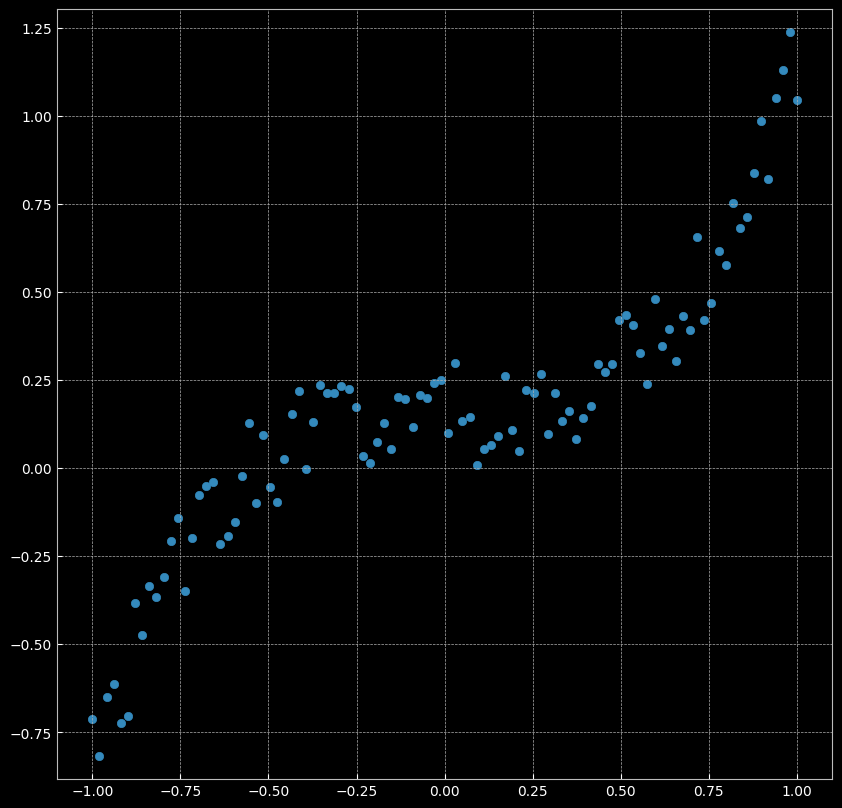

In [ ]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

### Linear model

Let's start again by creating a linear regression model to predict this function approximation. We can initialize the values of the hyper-parameters and create a Linear module with PyTorch as follows.

In [ ]:
# Initialize hyper-parameters
learning_rate = 1e-3
steps = 1000

# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

# print the model
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


Let's train our linear model using the training loop.

In [ ]:
# we use MSE (mean squared error) loss from the nn package for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # built-in L2

# Training loop
for t in range(1000):

    # forward pass over the model to get the logits (inputs to the loss function)
    y_pred = model(X)

    # Compute the loss (MSE)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)

    # zero the gradients before running the backward pass
    optimizer.zero_grad()

    # Backward pass to compute the gradient of loss w.r.t our learnable params
    loss.backward()

    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS or MSE]: 0.032808


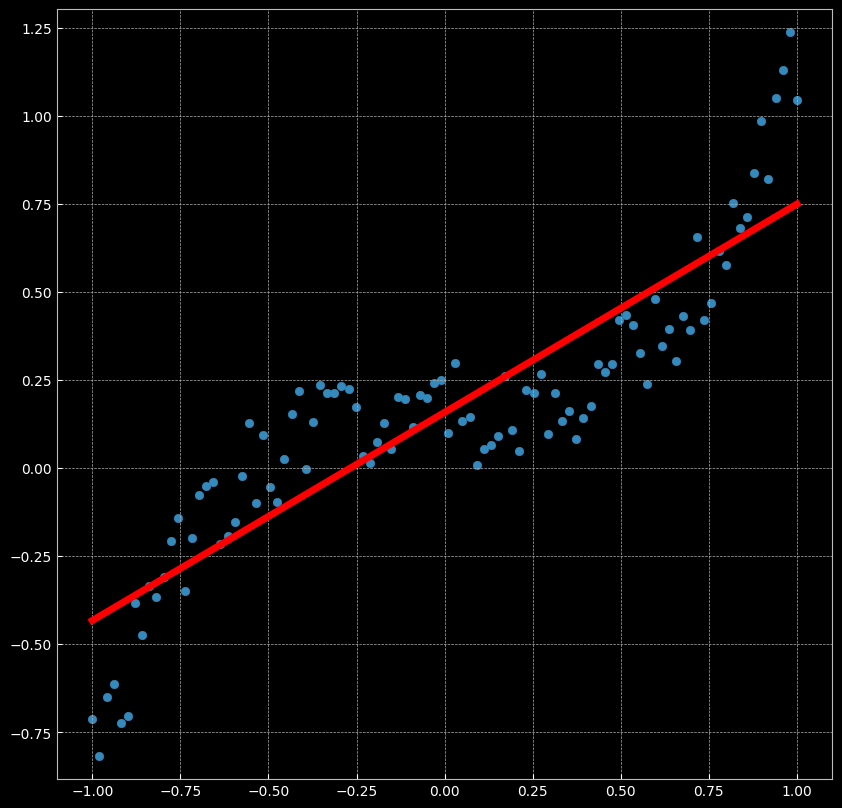

In [ ]:
# Plot trained model
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

Please take a moment to play with the values of the hyper-parameters and the value of H (number of hidden units) to observe the change in the models being learnt.

## Two-layer Network

Let's now implement a two layer multi-layer perceptron for the regression task. We will build 10 separate models, each with the same architecture but having different initial values of the parameters (weights and biases). This is to show the effect of local minima on model training.

Initialize the hyper-parameters:

In [ ]:
learning_rate = 1e-3
steps = 1000

Create the models. Half of the models have ReLU activations and the other half have TanH activations.

In [ ]:
# Number of networks
n_networks = 10
models = list()
y_pretrain = list()

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

for mod in range(n_networks):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Tanh(),
        nn.Linear(H, C)
    )

    # Append models
    models.append(model)

Print the models:

In [ ]:
print(models[0], models[-1])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


Create the training loop over the 10 models:

In [ ]:
for mod in range(n_networks):
    # select the i-th model
    model = models[mod]

    # while we could simply use the stochastic gradient descent optimized, we will use the ADAM optimizer
    # because of its robustness and speed
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

    # Training loop
    for t in range(1000):

        # Feed forward to get the logits
        y_pred = model(X)

        # Append pre-train output
        if t == 0:
            y_pretrain.append(y_pred.detach())

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        display.clear_output(wait=True)

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params.
        loss.backward()

        # Update params
        optimizer.step()

[MODEL]: 10, [EPOCH]: 999, [LOSS]: 0.010582


### Predictions: Before Training

These are how the model predictions were before training:

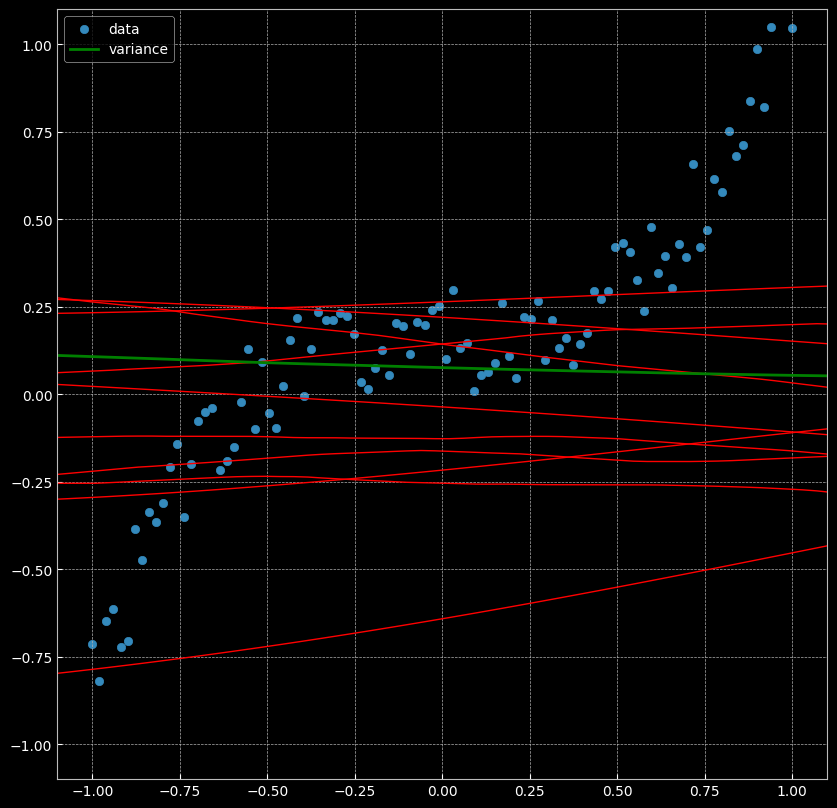

In [ ]:
for y_pretrain_idx in y_pretrain:
    # New X that ranges from -5 to 5 instead of -1 to 1
    X_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)

    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw=1)

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
plt.axis('square')
plt.axis((-1.1, 1.1, -1.1, 1.1));
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='variance');
plt.legend()

### Predictions: After Training

These features show how predictions changed after training:

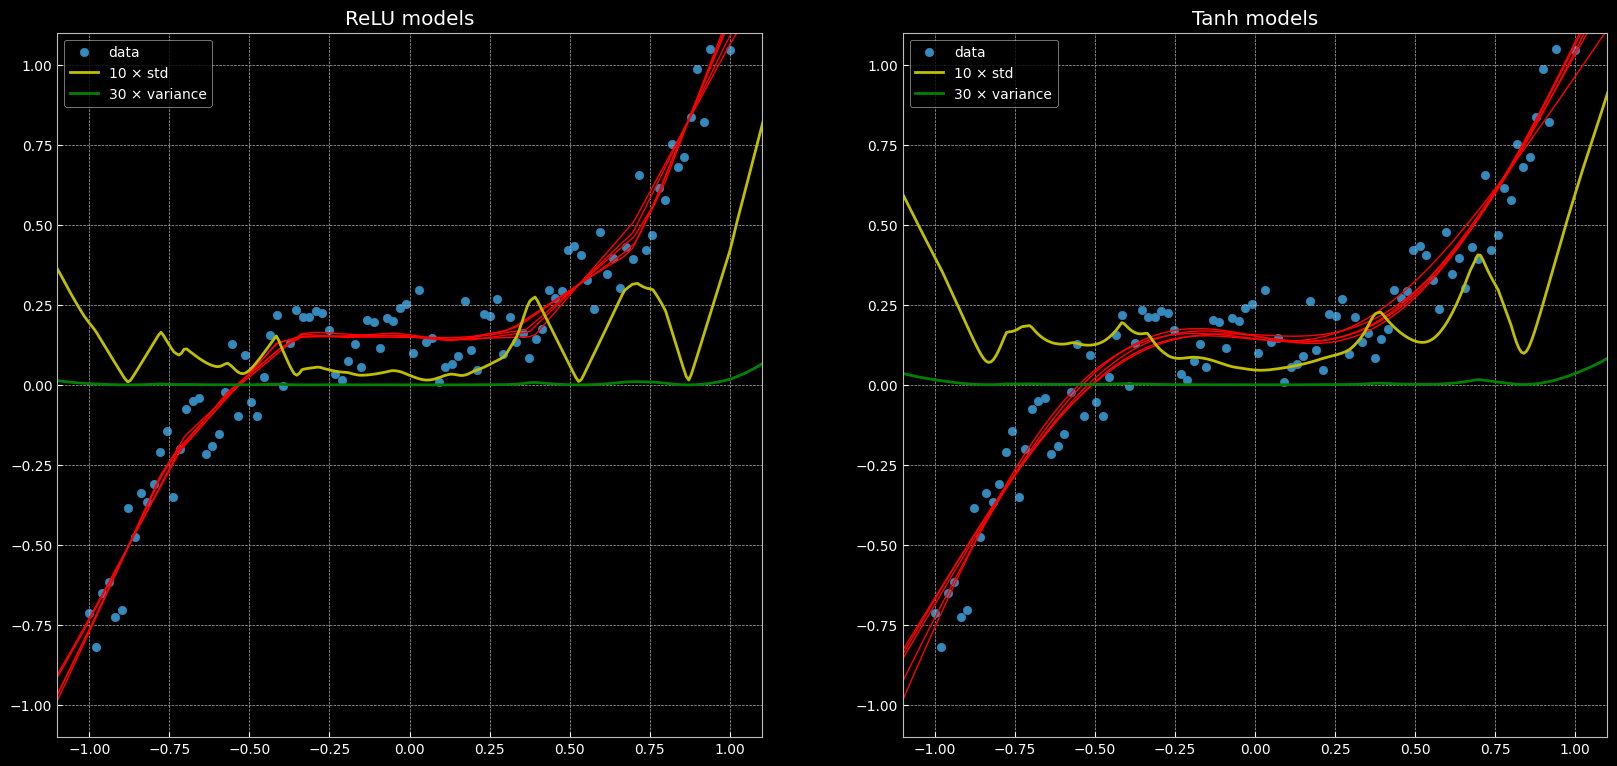

In [ ]:
y_pred = list()
relu_models = models[:n_networks // 2]
tanh_models = models[n_networks // 2:]
plt.figure(figsize=(20, 10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'ReLU' else 2)
    for model in models:
        # New X that ranges from -5 to 5 instead of -1 to 1
        X_new = torch.unsqueeze(torch.linspace(-4, 4, 1001), dim=1)

        # Getting predictions from input
        with torch.no_grad():
            y_pred.append(model(X_new))

        plt.plot(X_new.cpu().numpy(), y_pred[-1].cpu().numpy(), 'r-', lw=1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
    plt.axis('square')
    plt.axis(torch.tensor((-1.1, 1.1, -1.1, 1.1)) * zoom);
    y_combo = torch.stack(y_pred)
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().sqrt().numpy(), 'y', label='10 × std')
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().numpy(), 'g', label='30 × variance')
    plt.legend()
    plt.title(non_linearity + ' models')

z = 1  # try 1 or 4
dense_prediction(relu_models, 'ReLU', zoom=z)
dense_prediction(tanh_models, 'Tanh', zoom=z)